In [18]:
# Import Dependencies f

In [3]:
import logging
import shutil 
import pandas as pd
from sklearn.model_selection import train_test_split
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves

In [4]:
import tensorflow as tf
tf.test.is_built_with_cuda()

False

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13463919733390256246]

# Load Social Network data

In [7]:
raw_df = pd.read_csv('okcupid_profiles.csv')
raw_df.shape

(59946, 31)

In [8]:
raw_df.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

In [9]:
train_df, vald_df = train_test_split(raw_df, test_size = 0.3, random_state=13)
print(train_df.shape, vald_df.shape)

(41962, 31) (17984, 31)


In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41962.0,32.391140,9.470542,18.0,26.0,30.0,37.0,109.0
height,41959.0,68.292381,3.983787,1.0,66.0,68.0,71.0,95.0
income,41962.0,20162.673919,97959.429239,-1.0,-1.0,-1.0,-1.0,1000000.0


In [11]:
essay0=raw_df.essay0
essay0 = essay0.str.replace('<[^<]+?>', '') 
essay0= essay0.str.replace('\n', '') 
essay0[1:10000].to_csv('essay0.csv')
essay0[1:10000]

1       i am a chef: this is what that means. 1. i am ...
2       i'm not ashamed of much, but writing public te...
3               i work in a library and go to school. . .
4       hey how's it going? currently vague on the pro...
5       i'm an australian living in san francisco, but...
                              ...                        
9995    hi my name is chantea and i am 23, i am a hair...
9996    i came to the states when i was 17, and i fini...
9997    heey :) i am 19 and bi sexual . i have a lovin...
9998    after giving this much thought i have finally ...
9999    loving life here in disco san francisco and ha...
Name: essay0, Length: 9999, dtype: object

# Model Training with Ludwig

In [15]:
model_definition = {'input_features':[{'name': 'essay0',
                                       'type': 'text', 
                                       'level': 'word',
                                       'encoder': 'rnn',
                                       'cell_type': 'lstm',
                                       'preprocessing': {'lowercase': True,
                                                         'missing_value_strategy': 'fill_with_const',
                                                         'padding': 'right',
                                                         'padding_symbol': '<PAD>',
                                                         'unknown_symbol': '<UNK>',
                                                         'word_most_common': 500,
                                                         'word_sequence_length_limit': 256,
                                                         'word_tokenizer': 'space_punct',
                                                         'word_vocab_file': None}}], 
                    'output_features': [ {'name': 'wantskids', 'type': 'binary'},
                                       {'name': 'short', 'type': 'binary'},
                                        {'name': 'dog_person', 'type': 'binary'},
                                        {'name': 'vegetarian', 'type': 'binary'},
                                        {'name': 'gay', 'type': 'binary'},
                                       {'name': 'body_thin', 'type': 'binary'}], 
                    'training':{'epoch':20}}


In [ ]:
model = LudwigModel(model_definition= model_definition )

In [ ]:
train_stats = model.train(data_train_df=train_df, 
                          data_validation_df = vald_df, 
                          gpus= 0, gpu_fraction= 10.0)

# Training Loop Visualization

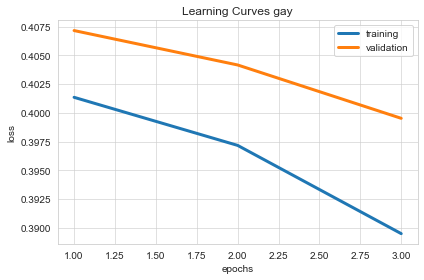

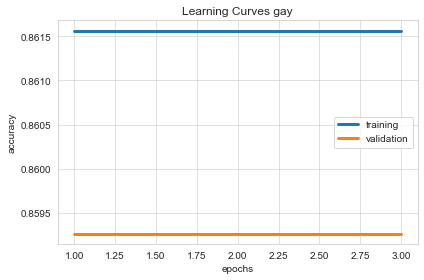

In [66]:
learning_curves(train_stats, 'gay',
                output_directory='./visualizations',
                file_format='png')